In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import csv
submission = open('my_submission.csv', 'w')
    
color = sns.color_palette()
sns.set_style('darkgrid')

In [2]:
from scipy import stats
from sklearn import preprocessing
from sklearn import utils
from sklearn import ensemble
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn import metrics
from scipy.special import boxcox1p
from sklearn import tree
from sklearn.model_selection import KFold

In [3]:
#get the data and indicate the shape

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
solutions = pd.read_csv("sample_submission.csv")
train.drop("Id", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)
a = solutions.Id.values
solutions.drop("Id", axis=1, inplace=True)
print("train shape ", train.shape, " test shape ", test.shape)

train shape  (1460, 80)  test shape  (1459, 79)


In [5]:
#generate the train_sale_prices
#concatenate train and test set

In [6]:
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is ", all_data.shape)

all_data size is  (2919, 80)


In [7]:
#visualize the correlation between int features and SalePrice

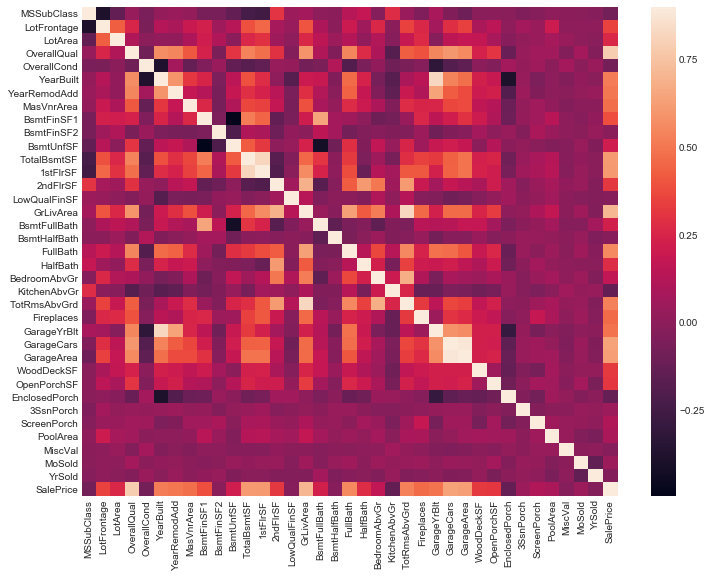

In [8]:
correlation = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(correlation, vmax=0.9)
plt.show()

In [9]:
#indicate the features which have either large correlation or small corr

In [10]:
large_corr = correlation[correlation['SalePrice'] > 0.6]
small_corr = correlation[correlation['SalePrice'] < 0.05]
pd.DataFrame(large_corr)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
SalePrice,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [11]:
pd.DataFrame(small_corr)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
LowQualFinSF,0.046474,0.038469,0.004779,-0.030429,0.025494,-0.183784,-0.062419,-0.069071,-0.064503,0.014807,...,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.028921,-0.025606
BsmtHalfBath,-0.002333,-0.007234,0.048046,-0.040150,0.117821,-0.038162,-0.012337,0.026673,0.067418,0.070948,...,0.040161,-0.025324,-0.008555,0.035114,0.032121,0.020025,-0.007367,0.032873,-0.046524,-0.016844
KitchenAbvGr,0.281721,-0.006069,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.037610,-0.081007,-0.040751,...,-0.090130,-0.070091,0.037312,-0.024600,-0.051613,-0.014525,0.062341,0.026589,0.031687,-0.135907
EnclosedPorch,-0.012037,0.010700,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.110204,-0.102303,0.036543,...,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.043825,0.070029,0.020423,0.030371,0.025504,0.031355,0.045286,0.018796,0.026451,-0.029993,...,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
MiscVal,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,0.004940,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,-0.013585,0.011200,0.001205,0.070815,-0.003511,0.012398,0.021490,-0.005965,-0.015727,-0.015211,...,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432


In [12]:
#normalize the train_sale_prices
#find the missing data

In [13]:
y_train = np.log1p(y_train)

null_data = (all_data.isnull().sum() / len(all_data)) * 100
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null_data})
missing_data

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageQual,5.447071
GarageCond,5.447071
GarageFinish,5.447071


In [14]:
#drop the features that have the missing ratio more than 80%
#for smaller missing ratio, fill NAN with None or special keywords

In [15]:
all_data = all_data.drop(missing_data[missing_data['Missing Ratio'] > 80].index,1)

for i in ['FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
         'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrType']:
    all_data[i] = all_data[i].fillna("None")

all_data['Exterior1st'] = all_data['Exterior1st'].fillna("Other")
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna("Other")
all_data['SaleType'] = all_data['SaleType'].fillna("Oth")
all_data['Utilities'] = all_data['Utilities'].fillna("AllPub")
all_data['Functional'] = all_data['Functional'].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")

In [16]:
#fill NAN with most frequent value or mean value

In [17]:
imp = preprocessing.Imputer(strategy='most_frequent')
imp2 = preprocessing.Imputer(strategy='mean')

for j in ['BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']:
    all_data[j] = imp.fit_transform(all_data[[j, 'SalePrice']])
    
for k in ['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 
          'TotalBsmtSF', 'LotFrontage']:
    all_data[k] = imp2.fit_transform(all_data[[k, 'SalePrice']])
    
for l in ['GarageCars', 'MasVnrArea', 'BsmtUnfSF', 'BsmtFinSF2', 
          'BsmtFinSF1', 'GarageArea', 'GarageYrBlt']:
    all_data[l] = all_data[l].fillna(0)
    
for m in['MSZoning', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2']:
    all_data[m] = all_data[m].fillna(all_data[m].mode()[0])


In [18]:
#check whether you handle all missing data 

In [19]:
null_data = (all_data.isnull().sum() / len(all_data)) * 100
null_data = null_data.drop(null_data[null_data == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :null_data})
missing_data

,Missing Ratio
SalePrice,49.982871


In [20]:
#convert all data types to categorical types

In [21]:
lbl = preprocessing.LabelEncoder()
col = all_data.select_dtypes(include=['object'])
for labels in col:
    all_data[labels] = lbl.fit_transform(all_data[labels])

In [22]:
all_data.columns.groupby(all_data.dtypes)

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
        'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
        'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
        'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual', 'GarageType', 'GrLivArea', 'HalfBath',
        'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
        'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotShape',
        'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscVal',
        'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
        'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
        'SaleType', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'Utilities',
        'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
   

In [23]:
#visulization of features in order to find outliers
#drop outliers

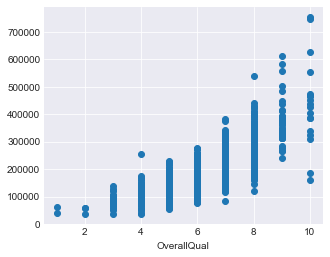

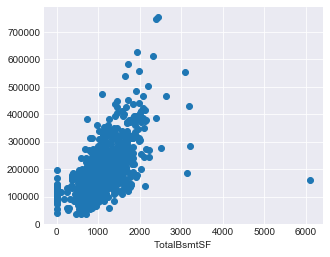

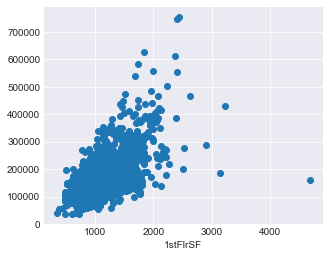

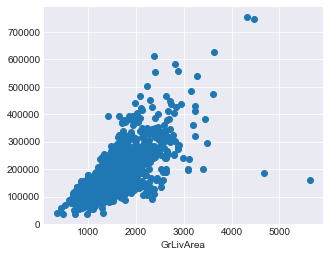

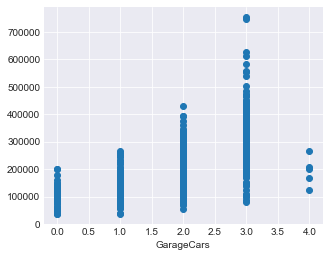

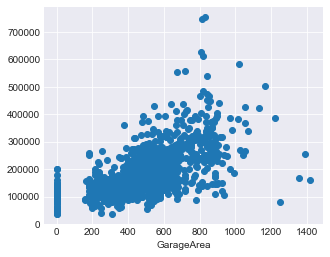

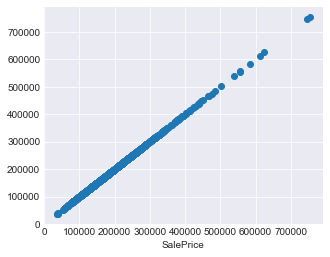

In [24]:
for c in large_corr.transpose().columns:
    plt.figure(figsize=(5,4))
    plt.scatter(train[c], train['SalePrice'])
    plt.xlabel(c)
    plt.show()

In [25]:
train = train.drop(train[train['TotalBsmtSF'] > 6000].index)
all_data = all_data.drop(all_data[all_data['TotalBsmtSF'] > 6000].index)

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index)
all_data = all_data.drop(all_data[(all_data['GrLivArea'] > 4000) & (all_data['SalePrice'] < 200000)].index)

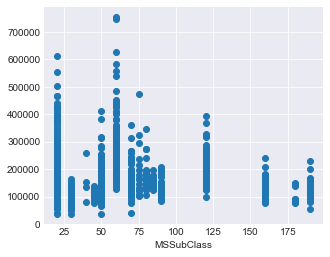

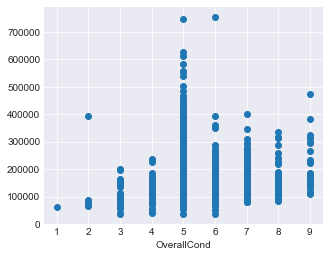

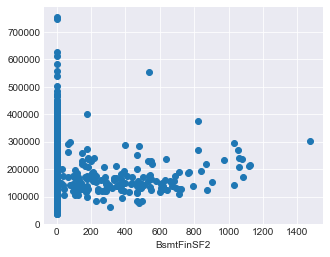

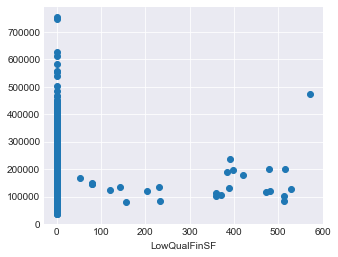

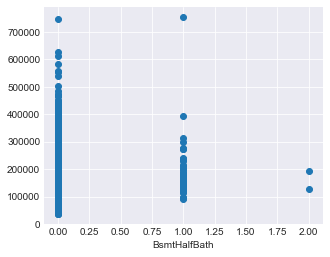

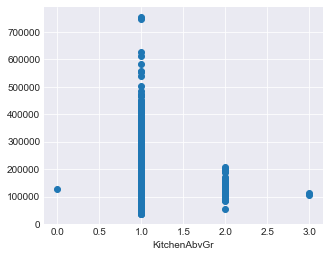

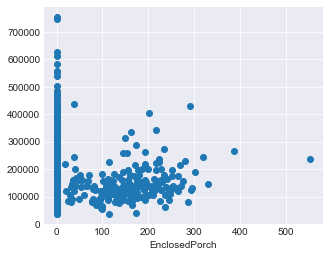

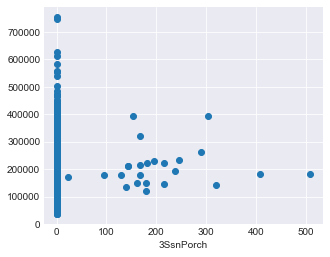

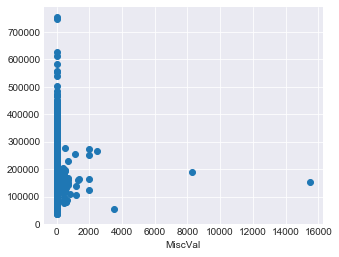

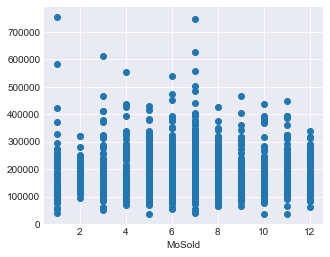

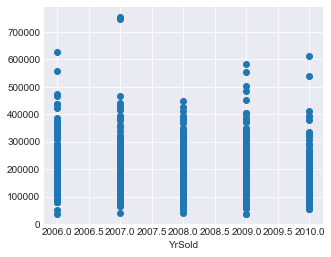

In [26]:
for c in small_corr.transpose().columns:
    plt.figure(figsize=(5,4))
    plt.scatter(all_data[c], all_data['SalePrice'])
    plt.xlabel(c)
    plt.show()

In [27]:
train = train.drop(train[(train['BsmtFinSF2'] > 1400) &  (train['SalePrice'] < 350000)].index)
all_data = all_data.drop(all_data[(all_data['BsmtFinSF2'] > 1400) & (all_data['SalePrice'] < 350000)].index)

train = train.drop(train[(train['EnclosedPorch'] > 500) & (train['SalePrice'] < 300000)].index)
all_data = all_data.drop(all_data[(all_data['EnclosedPorch'] > 500) & (all_data['SalePrice'] < 300000)].index)

train = train.drop(train[(train['MiscVal'] > 8000) & (train['SalePrice'] < 200000)].index)
all_data = all_data.drop(all_data[(all_data['MiscVal'] > 8000) & (all_data['SalePrice'] < 200000)].index)

In [28]:
#split the data in train and test sets
#check the shaps of sets

In [29]:
all_data.drop("SalePrice", axis=1, inplace=True)
y_train = train.SalePrice.values
n = train.shape[0]
X_train = all_data[:n]
X_test = all_data[n:]
print(X_train.shape, y_train.shape, X_test.shape)

(1454, 75) (1454,) (1459, 75)


In [30]:
#check for skewness
#apply boxcox transformation for each feature

In [31]:
skewness = pd.DataFrame({'Skew' : all_data.apply(lambda x: skew(x))}).sort_values(ascending=False, by=['Skew'])
skewness = skewness[abs(skewness) > skew(y_train)]
print(skewness.head(7))

lam=0.3
for each in skewness.index:
    all_data[each] = boxcox1p(all_data[each], lam)
skewness = pd.DataFrame({'Skew' : all_data.apply(lambda x: skew(x))}).sort_values(ascending=False, by=['Skew'])
skewness = skewness[abs(skewness) > skew(y_train)]
print(skewness.head(7))

                   Skew
Utilities     53.944419
MiscVal       25.322040
PoolArea      18.637892
LotArea       13.136138
Condition2    12.642858
LowQualFinSF  12.324306
Heating       12.066130
                   Skew
Utilities     53.944419
PoolArea      16.724316
Heating       10.334279
LowQualFinSF   9.163248
3SsnPorch      9.079732
RoofMatl       8.465446
MiscVal        6.410147


In [32]:
#apply log transform to decrease skewness

In [33]:
for each in skewness.index:
    all_data[each] = pd.DataFrame(np.log1p(all_data[each]))
    
skew1 = pd.DataFrame({'Skew' : all_data.apply(lambda x: skew(x))}).sort_values(ascending=False, by=['Skew'])
skew1 = skew1[abs(skew1) > skew(y_train)]
print(skew1.head(7))

                   Skew
Utilities     53.944419
PoolArea      16.257958
3SsnPorch      8.763481
LowQualFinSF   8.572057
Heating        8.542365
RoofMatl       8.345845
MiscVal        5.161899


In [34]:
#split the data again in train set and test set

In [35]:
X_train = all_data[:n]
X_test = all_data[n:]

In [36]:
d_tr = tree.DecisionTreeRegressor()
gr_b = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.05, n_estimators=300)
cv = KFold(n_splits=5,shuffle=False)
r2 = metrics.make_scorer(metrics.mean_squared_error)

In [37]:
#first apply Decision Tree and Gradient Boosting Regressor to the train set

In [38]:
d_tr.fit(X_train, y_train)
y_tr_pre = d_tr.predict(X_train)
print("r2 score ", metrics.r2_score(y_train, y_tr_pre))
print("cross_val_score ", cross_val_score(d_tr, X_train, y_tr_pre, cv=cv).mean())
np.sqrt(metrics.mean_squared_error(y_train, y_tr_pre))

r2 score  1.0
cross_val_score  0.776419986668


0.0

In [39]:
y_tr_pre

array([ 208500.,  181500.,  223500., ...,  266500.,  142125.,  147500.])

In [40]:
gr_b.fit(X_train, y_train)
y_tr_2 = gr_b.predict(X_train)
print("r2 score ", metrics.r2_score(y_train, y_tr_2))
print("cross_val_score ", cross_val_score(d_tr, X_train, y_tr_2, cv=cv).mean())
np.sqrt(metrics.mean_squared_error(y_train, y_tr_2))

r2 score  0.975282946933
cross_val_score  0.85471404125


12498.385679457284

In [41]:
y_tr_2

array([ 203858.97481641,  171067.98704123,  209937.69976652, ...,
        266528.64789019,  143496.00609472,  151947.58390622])

In [42]:
np.array(solutions)

array([[ 169277.0524984 ],
       [ 187758.39398877],
       [ 183583.68356955],
       ..., 
       [ 219222.42340006],
       [ 184924.279659  ],
       [ 187741.86665748]])

In [43]:
#apply Decision Tree and Gradient Boosting Regressor to the test set
#check the validation and error score
#compare with actual SalePrice

In [44]:
predicted = d_tr.predict(X_test)
print("r2 score ", metrics.r2_score(predicted, solutions))
print("cross_val_score ", cross_val_score(d_tr, X_test, predicted, cv=cv).mean())
np.sqrt(metrics.mean_squared_error(solutions, predicted))

r2 score  0.0668287117708
cross_val_score  0.845023900134


79552.854119587573

In [45]:
predicted

array([ 129000.,  163000.,  190000., ...,  148000.,  108000.,  200000.])

In [46]:
pred = gr_b.predict(X_test)
print("r2 score ", metrics.r2_score(pred, solutions))
print("cross_val_score ", cross_val_score(d_tr, X_test, pred, cv=cv).mean())
np.sqrt(metrics.mean_squared_error(solutions, pred))

r2 score  0.080806457164
cross_val_score  0.899473113392


75731.419604896204

In [47]:
pred

array([ 124124.19222986,  161866.67217681,  178356.57635274, ...,
        156760.71963391,  120071.47036728,  236290.05282888])

In [48]:
np.array(solutions)

array([[ 169277.0524984 ],
       [ 187758.39398877],
       [ 183583.68356955],
       ..., 
       [ 219222.42340006],
       [ 184924.279659  ],
       [ 187741.86665748]])

In [49]:
two_pre = pd.concat([pd.DataFrame(pred), pd.DataFrame(predicted)], axis=1)                
combined = linear_model.LinearRegression()
combined.fit(two_pre, solutions)
multi = combined.predict(two_pre)

In [50]:
print("r2 score ", metrics.r2_score(multi, solutions))
print("cross_val_score ", cross_val_score(d_tr, X_test, multi, cv=cv).mean())
np.sqrt(metrics.mean_squared_error(solutions, multi))

r2 score  -9.10674288775
cross_val_score  0.867728059406


15751.749448458628

In [55]:
multi = np.ravel(multi)

In [56]:
sol = pd.DataFrame({'Id': a, 'SalePrice': multi})
sol.to_csv(submission, index=False)
submission.close()